# Section 3.1: Linear regression, part 1

Thus far in this track we have largely investigated just machine-learning (ML) classification techniques. With linear regression, we will look at one of the most important predictive algorithms in ML.

The essence of linear regression is arguably the simplest form of ML: drawing a line through points. You might have done a simple form of this in your high school physics class: plot the results of a series of experiments on graph paper and then draw a line through as many points as possible (and include as many points below the line as above the line where the points don't fall on the line). That is a very form of linear regression. We will build on that conceptual foundation to address more complex situations, such as having points in more than two dimensions or even points whose relationship seems non-linear.

Formally, linear regression is used to predict a quantitative *response* (the values on a Y axis) that is dependent on one or more *predictors* (values on one or more axes that are orthogonal to $Y$, commonly just thought of collectively as $X$). The working assumption is that the relationship between the predictors and the response is more or less linear. The goal of linear regression is to fit a straight line in the best possible way to minimize the deviation between our observed responses in the dataset and the responses predicted by our line, the linear approximation. 

How do we tell that we have the best fit possible for our line? The most common means of assessing the error between the fit of our line -- our model -- and the data is called the [***least squares method***](https://en.wikipedia.org/wiki/Least_squares). This method consists of minimizing the number you get when you square the differences between your predicted values (the line) and the actual values (the data) and add up all of those squared differences for your entire dataset.

> **Learning goal:** By the end of this section, you should be comfortable fitting linear-regression models, and you should have some familiarity with interpreting their output.

## Load the data

In this section and the next (3.2), we will use national statistics gathered by the United Nations (UN) from 2009-2011 (accessed from the United Nations Statistics Division's [Social indicators page](https://unstats.un.org/unsd/demographic/products/socind/) on April 23, 2012). The data includes national health and welfare statistics for 199 countries and territories; these locations are mostly UN members, but the list also includes other areas that are not independent countries (such as Hong Kong).

The dataset includes 199 observations with the following features:
 - **region:** Region of the world
 - **group:** A factor (or categorical variable) with the following levels:
   - **oecd:** Countries that were members of the [Organisation for Economic Co-operation and Development](www.oecd.org) (OECD) as of May 25, 2012
   - **africa:** Countries on the continent of Africa (note: no OECD countries are located in Africa)
   - **other:** For all other countries
 - **fertility:** The total number of children born or likely to be born to a woman in her life time if she were subject to the prevailing rate of age-specific fertility in the population
 - **ppgdp:** Per-capita gross domestic product (GDP) in 2012 US dollars
 - **lifeExpF:** Female life expectancy in years
 - **pctUrban:** Percent of the population urbanized

We will need to load several modules for this section to handle the ML and visualizations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

We'll then load the data.

In [3]:
df = pd.read_csv('Data/UN11.csv')
df.head()

,region,group,fertility,ppgdp,lifeExpF,pctUrban
0,Asia,other,5.968,499.0,49.49,23
1,Europe,other,1.525,3677.2,80.40,53
2,Africa,africa,2.142,4473.0,75.00,67
3,Africa,africa,5.135,4321.9,53.17,59
4,Caribbean,other,2.000,13750.1,81.10,100


In [4]:
df['pctUrban'].min()

11

> **Technical note:** The path name for `read_csv()` is case sensitive.

## Simple linear regression

Let's plot out the data to see the relationship between per-capita GDP and female life expectancy.

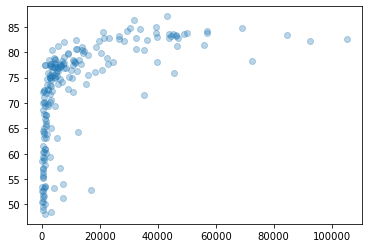

In [5]:
plt.scatter(df['ppgdp'], df['lifeExpF'], alpha=0.3);

> **Technical note:** The `alpha` parameter we supplied in the matplotlib `scatter` function; it makes the points semi-transparent so that we can where data points bunch up. Also note the semicolon at the end of the code snippet above; it silences the matplotlib memory-path output for cleaner inline graphing (without additional output above the graph, such as  `<matplotlib.collections.PathCollection at 0x7f2c54737f28>`).

Let's now plot a line and see what we get.

<ipython-input-6-c6512866ac4b>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['ppgdp'][:, np.newaxis]


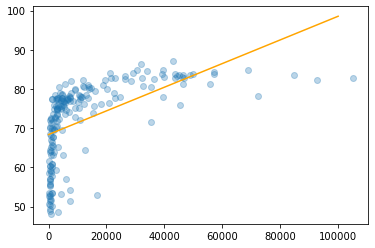

In [6]:
model = LinearRegression(fit_intercept=True)

X = df['ppgdp'][:, np.newaxis]
y = df['lifeExpF']

model.fit(X, y)

x_plot = np.linspace(0, 100000, 1000)
y_plot = model.predict(x_plot[:, np.newaxis])

plt.scatter(df['ppgdp'], df['lifeExpF'], alpha=0.3)
plt.plot(x_plot, y_plot, c='orange');

> **Technical note:** Notice in the code cell above that we did not fit the model using `model.fit(df['ppgdp'], df['lifeExpF'])`. Instead, we had to use `df['ppgdp'][:, np.newaxis]` for our predictors rather than just `df['ppgdp']`. The addition of `[:, np.newaxis]` changes `df['ppgdp']` from a pandas `Series` to an array in matrix format. (If you're unsure what that looks like, create a new code cell below this cell using **Insert > Insert Cell Below** and then run `df['ppgdp']` and then `df['ppgdp'][:, np.newaxis]` in order to see the difference.

Just how poor is this initial model? Let's calculate the $R^2$ score for it to see. The $R^2$ score (also called the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)) represents the proportion of the variance in our response that is predictable from the predictors -- so 0 is the worst (a model explains none of the variance) and 1 is the best (a model explains all of it).

In [7]:
from sklearn.metrics import r2_score

model = LinearRegression(fit_intercept=True)

model.fit(df['ppgdp'][:, np.newaxis], df['lifeExpF'])

predictions = model.predict(df['ppgdp'][:, np.newaxis])
r2_score(df['lifeExpF'], predictions)

<ipython-input-7-e2a2438d521e>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['ppgdp'][:, np.newaxis], df['lifeExpF'])
<ipython-input-7-e2a2438d521e>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predictions = model.predict(df['ppgdp'][:, np.newaxis])


0.30135661006266234

This first model accounts for only 30 percent of the variability in `lifeExpF` and is really not a very good representation of the relationship between economic activity and female life expectancy.

These results are not good, which stems from the fact that there is no linear relationship between per-capita GDP and female life expectancy. Instead, the relationship has an elbow-like curve to it. When countries are very poor, the data suggests that even modest increases to GDP per capita can dramatically increase female life expectancy, but only up to a point; once countries hit about USD 10,000 per head, additional gains correlated to increases in wealth are much smaller. This suggests a logarithmic relationship between these factors: female life expectancy being not related to GPD, but to its logarithm.

Let's create a new column that contains the logarithm of per-capita GDP by country. Note that, because we are dealing with powers of 10 in the GDP column, we will use the base-10 logarithm rather than the natural logarithm in order to make interpretation easier.

In [8]:
df['log_ppgdp'] = np.log10(df['ppgdp'])
df.head()

,region,group,fertility,ppgdp,lifeExpF,pctUrban,log_ppgdp
0,Asia,other,5.968,499.0,49.49,23,2.698101
1,Europe,other,1.525,3677.2,80.40,53,3.565517
2,Africa,africa,2.142,4473.0,75.00,67,3.650599
3,Africa,africa,5.135,4321.9,53.17,59,3.635675
4,Caribbean,other,2.000,13750.1,81.10,100,4.138306


Let's now plot our new `log_ppgdp` column against `lifeExpF` to see if there is a more linear relationship.

<ipython-input-9-203dd8911019>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


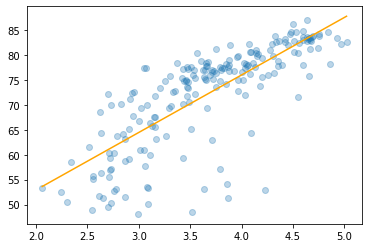

In [9]:
model = LinearRegression(fit_intercept=True)

X = df['log_ppgdp'][:, np.newaxis]
y = df['lifeExpF']

model.fit(X, y)

x_min = df['log_ppgdp'].min()
x_max = df['log_ppgdp'].max()
x_plot = np.linspace(x_min, x_max, 1000)
y_plot = model.predict(x_plot[:, np.newaxis])

plt.scatter(df['log_ppgdp'], df['lifeExpF'], alpha=0.3)
plt.plot(x_plot, y_plot, c='orange');

This is much better, but it is still far from perfect. The shape of the data seems to have a curve to it and we will examine how to deal with that shortly. However, let's first interpret the model have right here to see what it tells us. How much better is it than the first model? Let's look at the $R^2$ score.

In [10]:
model.fit(df['log_ppgdp'][:, np.newaxis], df['lifeExpF'])

predictions = model.predict(df['log_ppgdp'][:, np.newaxis])
r2_score(df['lifeExpF'], predictions)

<ipython-input-10-5064ac6f47bb>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['log_ppgdp'][:, np.newaxis], df['lifeExpF'])
<ipython-input-10-5064ac6f47bb>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predictions = model.predict(df['log_ppgdp'][:, np.newaxis])


0.5963834900027574

Using `log_ppgdp` rather than `ppgdp` in the model roughly doubles the amount of variance in `lifeExpF` that we can account for with this model (to 60 percent). But what does our model actually mean?

In [11]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     11.556295659454968
Model intercept: 29.814802497051247


Remember that in high school algebra lines were generally defined by an equation of the form

$$
y = ax + b
$$

where $a$ is the *slope* and $b$ is the *intercept*. That samer terminology applies in linear regression. The slope refers to our model's predicted change in units of female life expectancy (years) for each unit of the base-10 logarithm of per-capita GDP. In other words, our model predicts that, on average, women's life expectancies increase by 11.6 years every time per-capita GDP increases 10 fold.

The intercept is a little more abstract because it is not directly tied to any data point. It shows the value of the $y$-axis at the point where our line crossed that axis (where $x=0$). If we were still modeling `ppgdp` versus `lifeExpF`, we might interpret the intercept as representing women's baseline life expectancy in a hypothetical country with a per-capita GDP of USD 0: 29.8 years. However, we are modeling `log_ppgdp` versus `lifeExpF`, and the logarithm of 0 is undefined. Therefore, it can be easiest to accept the intercept in our model as a mathematical abstraction necessary to making other parts of our model work. Our model can be stated as:

$$
{\rm lifeExpF} = 11.6 \times {\rm log\_ppgdp} + 29.8
$$

## Polynomial regression

We can generalize the line equation above in the form favored by statisticians:

$$
y = β_0 + β_1x + \epsilon
$$

where $\epsilon$ is an unobserved random error that we generally fold into $β_0$. Nothing says that we can have only one $x$ term, however. We can define a linear model for our data of the form

$$
y = β_0 + β_1x + β_2x^2 + \epsilon
$$

This is still a linear relationship because none of our $\beta$s ever multiply or divide each other. In fact, we can generalize linear models to the form

$$
y = β_0 + β_1x + β_2x^2 + β_3x^3 + \cdots + β_nx^n + \epsilon
$$

The linearity of our models depend on the linearity of $β_n$, not $x_n$. We will use this fact to use linear regression to model data that does not follow a straight line. Let's apply this to our model of `log_ppgdp` and `lifeExpF`.

<ipython-input-12-4afd2355cf0c>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


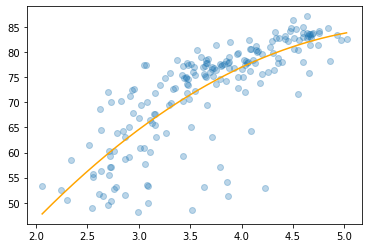

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X = df['log_ppgdp'][:, np.newaxis]
y = df['lifeExpF']
x_min = df['log_ppgdp'].min()
x_max = df['log_ppgdp'].max()
x_plot = np.linspace(x_min, x_max, 1000)
x_fit = poly.fit_transform(x_plot[:, np.newaxis])
X_ = poly.fit_transform(X)

poly_model = LinearRegression(fit_intercept=True)
poly_model.fit(X_, y)

x_fit[:, np.newaxis]
y_fit = poly_model.predict(x_fit)

plt.scatter(df['log_ppgdp'], df['lifeExpF'], alpha=0.3)
plt.plot(x_fit[:,1], y_fit, c='orange');

Adding the polynomial term provides us with a much more intuitive fit of the data! The `degree=2` parameter that we supply to the `PolynomialFeatures` function dictates that our model takes the form of

$$
y = β_0 + β_1x + β_2x^2
$$

Let’s see what the coefficients for our model are.

In [13]:
poly = PolynomialFeatures(degree=2)

X = df['log_ppgdp'][:, np.newaxis]
y = df['lifeExpF']
x_min = df['log_ppgdp'].min()
x_max = df['log_ppgdp'].max()
x_plot = np.linspace(x_min, x_max, 1000)
x_fit = poly.fit_transform(x_plot[:, np.newaxis])
X_ = poly.fit_transform(X)

poly_model = LinearRegression(fit_intercept=True)
poly_model.fit(X_, y)

print("Model slope:    ", poly_model.coef_)
print("Model intercept:", poly_model.intercept_)

Model slope:     [ 0.         32.14216588 -2.82047664]
Model intercept: -6.461431455416204


<ipython-input-13-9f8b98f37ed7>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


> **Technical note:** The code cell above is intentionally redundant. The last two lines of code in it would suffice to print the fitted model’s slope and intercept coefficients. However, inline graphing in Jupyter notebooks can be finicky; the entire code snippet necessary to fit the model is given so that a student unable to run the visualization will nonetheless be able to continue on with follow-on portions of the section dealing with the same model.

We can state our polynomial model as

$$
{\rm lifeExpF} = -6.5 + 32.1 \times {\rm log\_ppgdp} - 2.8 \times {\rm log\_ppgdp}^2
$$

Using the polynomial model improves predictive power, but it comes at the cost of interpretability. What is the intuitive relationship between `lifeExpF` and `log_ppgdp` now?

> **Technical note:** Fitting the polynomial-regression model above has a lot of steps in it, and performing these transformations (transforming the features for polynomial regression and fitting the regression model) manually can quickly become tedious and error prone. To streamline this type of processing, scikit-learn provides the `Pipeline` object, which you can use to encapsulate several transformations into one step. Let's run this model again using scikit-learn `make_pipeline()`.

<ipython-input-14-13e492d9f651>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


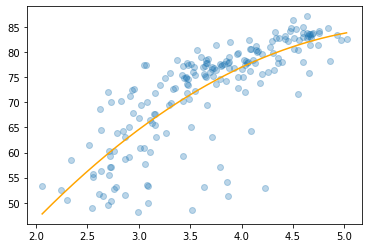

In [14]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

X = df['log_ppgdp'][:, np.newaxis]
y = df['lifeExpF']
poly_model.fit(X, y)
x_min = df['log_ppgdp'].min()
x_max = df['log_ppgdp'].max()
x_plot = np.linspace(x_min, x_max, 1000)
y_plot = poly_model.predict(x_plot[:, np.newaxis])

plt.scatter(df['log_ppgdp'], df['lifeExpF'], alpha=0.3)
plt.plot(x_plot, y_plot, c='orange');

That was much simpler to code! But how much did going through the work doing the polynomial regression help our model?

In [15]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model.fit(df['log_ppgdp'][:, np.newaxis], df['lifeExpF'])

predictions = poly_model.predict(df['log_ppgdp'][:, np.newaxis])
r2_score(df['lifeExpF'], predictions)

<ipython-input-15-39b95d72af72>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(df['log_ppgdp'][:, np.newaxis], df['lifeExpF'])
<ipython-input-15-39b95d72af72>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predictions = poly_model.predict(df['log_ppgdp'][:, np.newaxis])


0.6140796187140456

Our improved, polynomial model now accounts for 61.4 percent of the variance in `lifeExpF`. Clearly an improvement, but a modest one.

> **Exercise**
>
> Go to the code cell in which we fitted the polynomial model using `make_pipeline()` and try different values (>2) in `PolynomialFeatures` to see what using higher-degree polynomials does for our model.

> **Exercise solution**
Here is a comparison of the outputs for models using three-degree, four-degree, and five-degree polynomials.

<ipython-input-16-31002ed90960>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]
<ipython-input-16-31002ed90960>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]
<ipython-input-16-31002ed90960>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


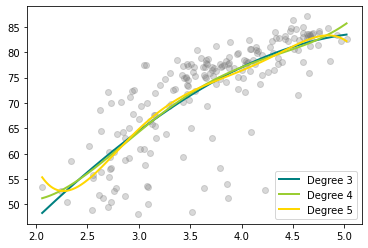

In [16]:
colors = ['teal', 'yellowgreen', 'gold']

x_min = df['log_ppgdp'].min()
x_max = df['log_ppgdp'].max()
x_plot = np.linspace(x_min, x_max, 1000)

plt.scatter(df['log_ppgdp'], df['lifeExpF'], alpha=0.3, c='gray')

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())
    X = df['log_ppgdp'][:, np.newaxis]
    y = df['lifeExpF']
    model.fit(X, y)
    y_plot = model.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, y_plot, color=colors[count], 
             linewidth=2, label="Degree %d" % degree)

plt.legend(loc='lower right')

plt.show();

Let’s see what the $R^2$ scores for the different-degree polynomial models are.

In [17]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())
    X = df['log_ppgdp'][:, np.newaxis]
    y = df['lifeExpF']
    model.fit(X, y)
    predictions = model.predict(X)
    print("Degree %d" % degree, "r-squared score:", 
          r2_score(df['lifeExpF'], predictions))

Degree 3 r-squared score: 0.6141421612388428
Degree 4 r-squared score: 0.6160520910424709
Degree 5 r-squared score: 0.6208416438555957


<ipython-input-17-2dc34ea66a51>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]
<ipython-input-17-2dc34ea66a51>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]
<ipython-input-17-2dc34ea66a51>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['log_ppgdp'][:, np.newaxis]


Each additional polynomial degree improves the fit of our model (as demonstrated by the incremental improvements to the r-squared scores). However, adding more degrees to the polynomial regressions opens us to the risk of [overfitting](https://en.wikipedia.org/wiki/Overfitting), a process by which our models come to fit the training data too closely and are thus less useful in predicting more generalized data.

Higher-degree polynomials also bring back the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). Simple linear models need only $N + 1$ sample points to fit, where $N$ is the number of dimensions (2 points in 1 dimension, 3 in 2 dimensions, 4 in three dimensions, and so on). However, each additional polynomial degree increases the number of sample points required for a given dimensionality much faster. Particularly if certain data points are difficult or expensive to come by, you might run out of data in order to fit a high-degree polynomial model.

## Multiple regression

Ultimately, no matter how complex the model we construct between `log_ppgdp` and `lifeExpF`, we will only be able to explain so much of variability because factors other than per-capita GDP affect female life expectancy. Using more than one predictor in our regression model helps us capture more of this richness of detail.

Let's start by plotting the relationship between log per-capita GDP, urbanization, and female life expectancy in three dimensions.

> **Technical note:** We reimport matplotlib to work around a know issue in switching between `%matplotlib inline` and `%matplotlib notebook`. If the scatterplot does not render the first time, run the code cell again. You might also have to click in the figure in order to get it to render.

<IPython.core.display.Javascript object>


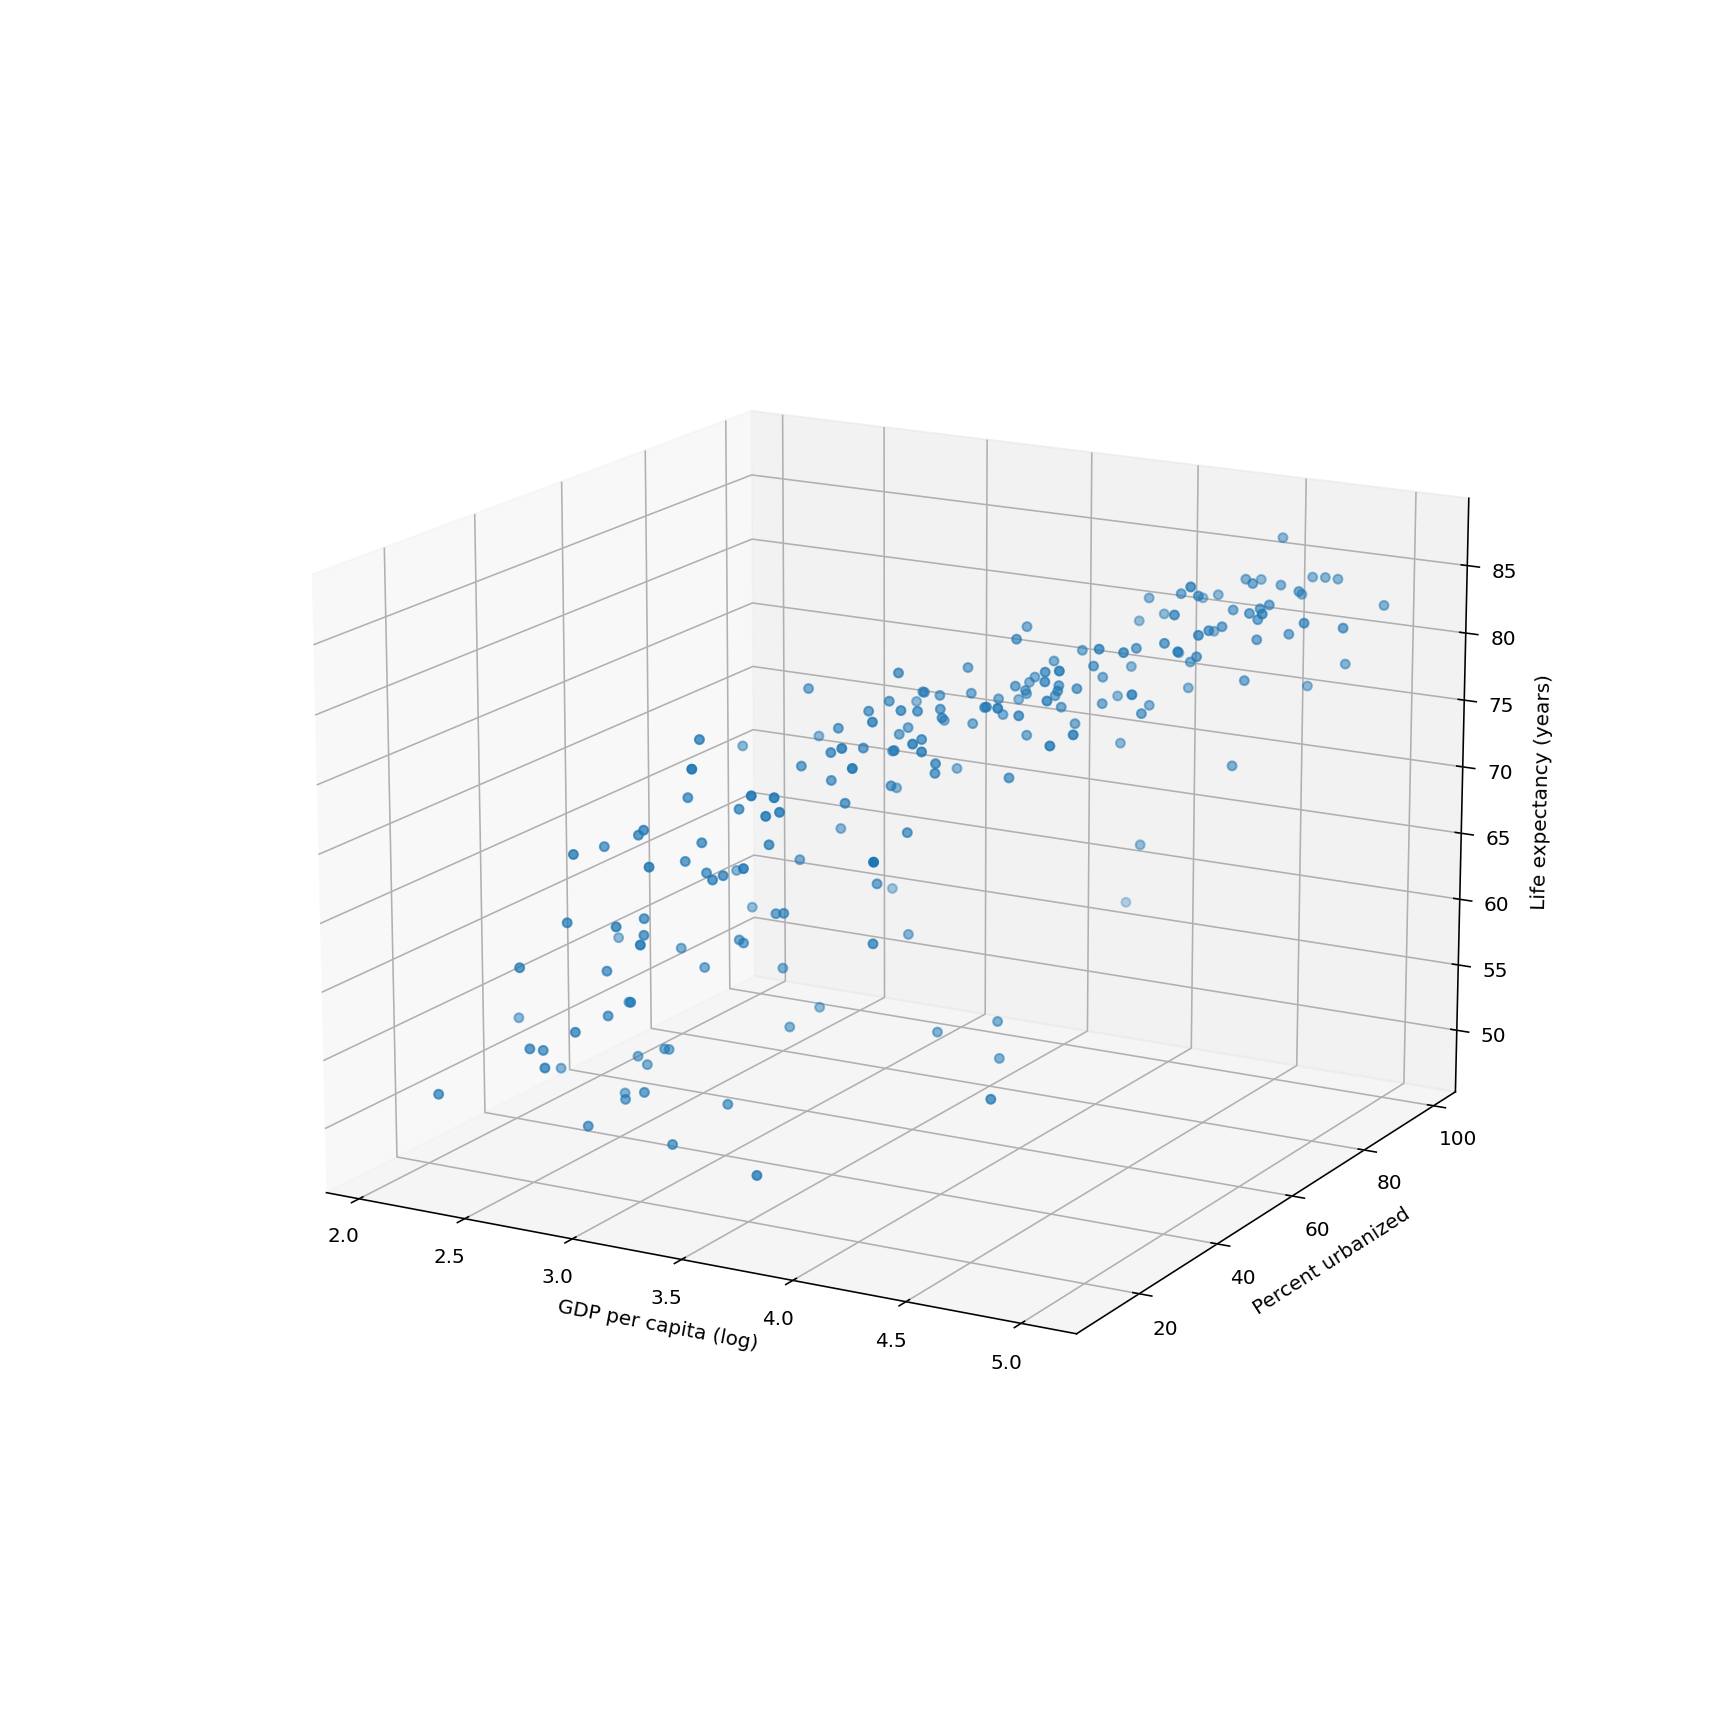

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['log_ppgdp'], df['pctUrban'], df['lifeExpF'])

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

Go ahead and move this figure around! It's interactive.

Let's fit a simple, multi-dimensional model to examine this relationship.

<IPython.core.display.Javascript object>


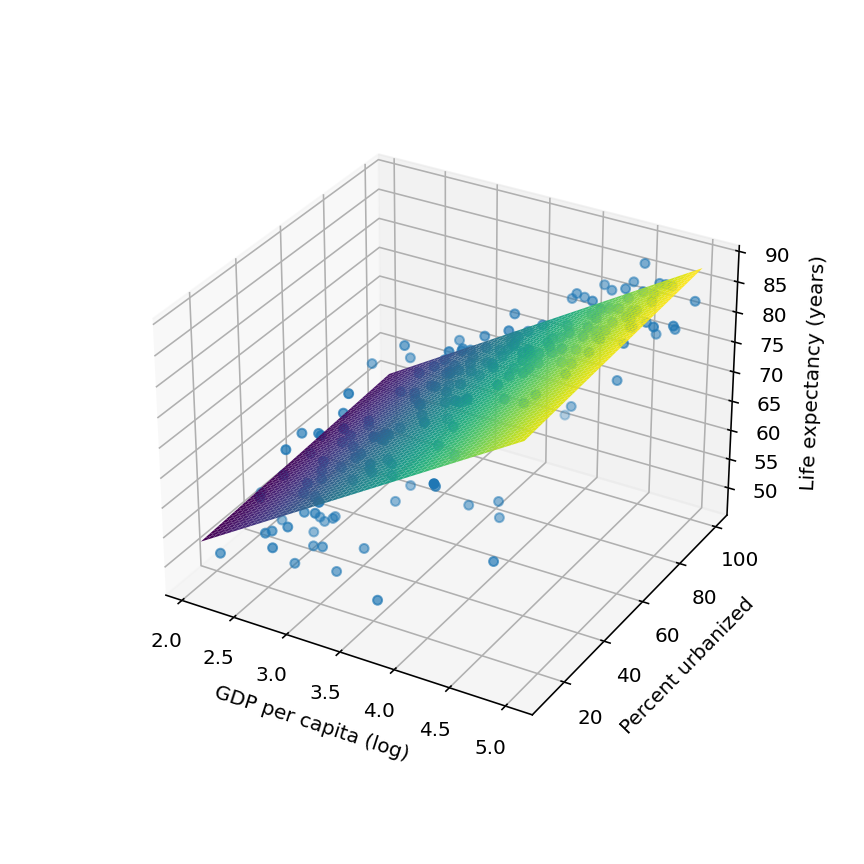

In [19]:
model = LinearRegression(fit_intercept=True)

X = df[['log_ppgdp', 'pctUrban']]
y = df['lifeExpF']

model.fit(X, y)

x1_plot = np.linspace(df['log_ppgdp'].min(), df['log_ppgdp'].max(), 1000)
x2_plot = np.linspace(df['pctUrban'].min(), df['pctUrban'].max(), 1000)
X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
y_plot = model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['log_ppgdp'], df['pctUrban'], df['lifeExpF'])
ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap='viridis');

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

How accurate is our multiple-regression model?

In [20]:
model = LinearRegression(fit_intercept=True)

X = df[['log_ppgdp', 'pctUrban']]
y = df['lifeExpF']

model.fit(X, y)

predictions = model.predict(X)
r2_score(df['lifeExpF'], predictions)

0.5976310585601522

This model explains 59.8 percent of the variance in `lifeExpF`: better than our initial simple linear model ($R^2=$ 0.596), but not spectacularly so.

What does this new model mean?

In [21]:
print("Model slopes:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slopes:     [10.96001505  0.02300815]
Model intercept: 30.673744300059994


Our model now has two predictors in it, so it takes the generalized form:

$$
y = β_0 + β_1x_1 + β_2x_2
$$

Specifically, our model is:

$$
{\rm lifeExpF} = 30.7 + 11 \times {\rm log\_ppgdp} + 0.023 \times {\rm pctUrban}
$$

Multiple regression is a little trickier to interpret than simple regression, but not enormously so. Our model says that if we were to hold all other factors equal, then increasing the per-capita GDP of a country 10 fold will (on average) add 11 years to women's life expectancy. It also says that if we keep everything else the same, then increasing the urbanization of a country by 1 percent will increase women's life expectancy by 0.023 years. (Remember that we can’t think of the intercept as representing a hypothetical baseline country with USD0 GDP and 0 urbanization, because the logarithm of 0 is undefined.) This is another way of showing that adding `pctUrban` to our model provides some additional predictive power to our simple model, but not much. But does it do anything if we add it to a polynomial model?

<IPython.core.display.Javascript object>


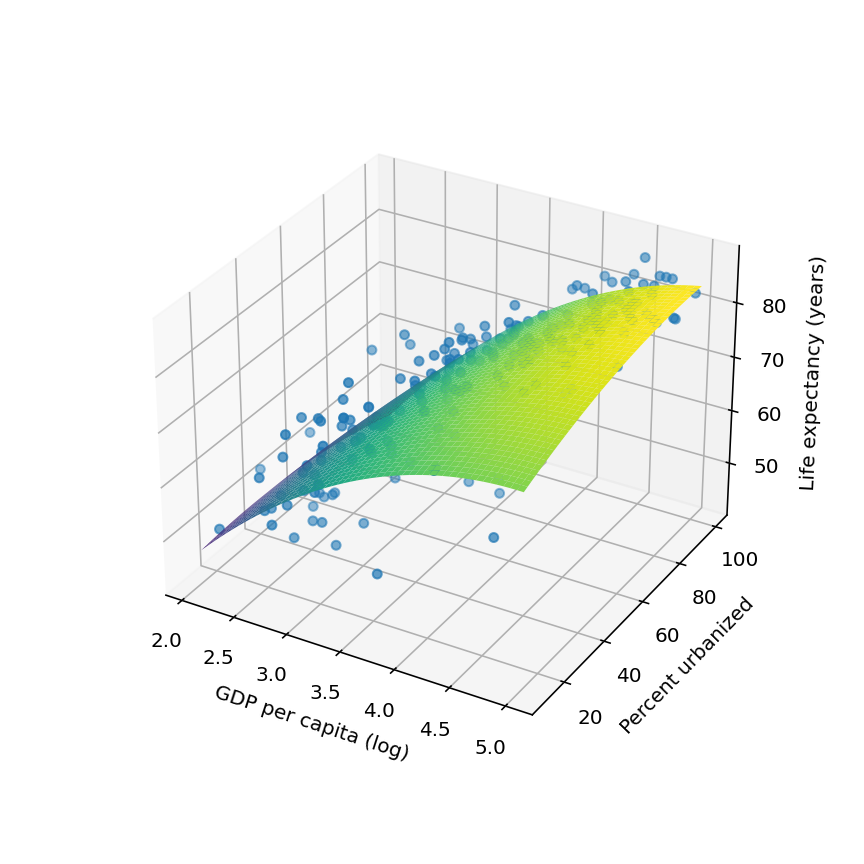

In [22]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

X = df[['log_ppgdp', 'pctUrban']]
y = df['lifeExpF']

poly_model.fit(X, y)

x1_plot = np.linspace(df['log_ppgdp'].min(), df['log_ppgdp'].max(), 1000)
x2_plot = np.linspace(df['pctUrban'].min(), df['pctUrban'].max(), 1000)
X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
y_plot = poly_model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['log_ppgdp'], df['pctUrban'], df['lifeExpF'])
ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap='viridis');

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

Let’s take a look at the $R^2$ for this model.

In [23]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

X = df[['log_ppgdp', 'pctUrban']]
y = df['lifeExpF']

poly_model.fit(X, y)

predictions = poly_model.predict(X)
r2_score(df['lifeExpF'], predictions)

0.6171027296858922

In the polynomial regression, adding `pctUrban` to our model provides a decent improvement to our model's predictive power (for example, this model's $R^2$ score is higher than those that we got with our two-degree, three-degree, or four-degree models using just `log_ppgdp`).

More than just boosting the $R^2$ score, fitting the multiple polynomial regression provides additional insights from the visualization. If you rotate the visualization above 180 degrees about the $z$-axis, you will notice that while our model predicts increased female life expectancy at high incomes, in poor countries, our model actually shows a *decrease* in female life expectancy in poor countries correlated with increased urbanization.

All of these conclusions come from a model that treats all of the data as coming from a rather monolithic whole. We have other types of data that we can also use in our modeling to try and arrive at different insights.

## Categorical data

Our dataset has two categorical features (also known as *factors* in the statistical world): `region` and `group`. There are multiple ways of handling data like this in linear regression; here, we will handle it by building sub-models for it.

To begin moving in that analytical direction, let's start by color coding our 3D scatterplot points by `group`.

In [ ]:
groups = df.groupby('group')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
for name, group in groups:
    ax.scatter(group['log_ppgdp'], 
               group['pctUrban'], 
               group['lifeExpF'], label=name)
ax.legend()

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

ax.legend()

plt.show();

Unsurprisingly, OECD-member countries cluster at the high end of the income scale and, sadly, African countries lag at the poorer end. Countries from the `other` group include countries ranging from poor ones in Southeast Asia to oil-rich Middle Eastern countries, and thus countries from that group are scattered across the income spectrum.

Now that we have the data points detailed in color, let's fit three separate, simple linear models for each group of countries.

In [ ]:
model = LinearRegression(fit_intercept=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

groups = df.groupby('group')
cmaps = ['Blues_r', 'Oranges_r', 'Greens_r']

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    model.fit(X, y)

    x1_plot = np.linspace(group['log_ppgdp'].min(), group['log_ppgdp'].max(), 1000)
    x2_plot = np.linspace(group['pctUrban'].min(), group['pctUrban'].max(), 1000)
    X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
    y_plot = model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])
    
    ax.scatter(group['log_ppgdp'], group['pctUrban'], group['lifeExpF'], label=name)
    cmap_index = sorted(df['group'].unique().tolist()).index(name)
    cmap = cmaps[cmap_index]
    ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap=cmap);

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

> **Technical note:** The blue plane models the `africa` group, the orange one `oecd`, and `other` is green.

The opacity of the various planes can make it hard to pick out the details, but if you rotate the graph, you should be able to see that while the `other` and `oecd` models behave similarly, the `africa` sub-model exhibits different behavior and responds more dramatically to increases in per-capita GDP and urbanization for increasing women's lifespans.

> **Exercise**
>
> Changing color map for 3D plots like these can sometime help make different details clearer. Locate the `cmap` parameter in the `plot_surface()` function and change it to `cmap='viridis'`.

> **Exercise solution**

In [ ]:
model = LinearRegression(fit_intercept=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

groups = df.groupby('group')
cmaps = ['Blues', 'Oranges', 'Greens']

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    model.fit(X, y)

    x1_plot = np.linspace(group['log_ppgdp'].min(), group['log_ppgdp'].max(), 1000)
    x2_plot = np.linspace(group['pctUrban'].min(), group['pctUrban'].max(), 1000)
    X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
    y_plot = model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])

    ax.scatter(group['log_ppgdp'], group['pctUrban'], group['lifeExpF'], label=name)
    ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap='viridis');

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

How good are these models?

In [ ]:
groups = df.groupby('group')

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    model.fit(X, y)
    predictions = model.predict(X) 
    
    print(name, "r-squared score:", 
          r2_score(group['lifeExpF'], 
                   predictions))

These models are not great. But we will see if they are improved by using polynomial regression later on.

In [ ]:
model = LinearRegression(fit_intercept=True)

groups = df.groupby('group')

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    model.fit(X, y)
    
    print(name, "slopes:  ", model.coef_)
    print(name, "intercept:", model.intercept_)

What do these plots based on group tell us? The slopes for `log_ppgdp` are similar between the `africa` and `oecd` groups, but the slope is different for the `other` group. This suggests that there might be some interaction between `group` and `log_ppgdp` in explaining `lifeExpF`. The `pctUrban` slope for the `oecd` group has a different sign than for `africa` or `other`, which might indicate another interaction, but we are on shaky statistical ground here because we have done no testing to see if these differences in slope are statistically significant (for `pctUrban`, the differences—and the numbers—are small).

What do we mean by interactions between groups? Recall that we generalized a linear model with two features as:

$$
y=β_0+β_1 x_1+β_2 x_2
$$

However, if $x_1$ and $x_2$ interact—if different values of $x_1$, for example, change the influence of $x_2$ on $y$ — we need to include that in the model like so:

$$
y=β_0+β_1 x_1+β_2 x_2+β_3x_1x_2
$$

Our model involves three predictors (`log_ppgdp`, `pctUrban`, and `group`) and has this form:

$$
y=β_0+β_1 x_1+β_2 x_2+β_3 u_2+β_4 u_3+β_5x_1x_2+β_6 x_1 u_2+β_7 x_1 u_3+β_8 x_2 u_2+β_9 x_2 u_3+β_{10} x_1x_2u_2+β_{11}x_1x_2 u_3
$$

Think of this as another aspect of the curse of dimensionality: as we add features (especially categorical ones), the number of potential interactions between features that we have to account for increases even faster.

> **Technical note:** Statisticians often use the variable u for categorical features, a convention that we have used here. Also note that we only included $u_2$ and $u_3$ in the generalized equation for the model, even though we have three groups in the categorical feature group. This is not a mistake; it is because one group from the categorical feature gets included in the intercept.


> **Question**
>
> Do you see where these numbers come from? What do you think the intercepts indicate for each of these groups?

Let's now see what happens when we plot polynomial models for each of these groups.

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

groups = df.groupby('group')
cmaps = ['Blues_r', 'Oranges_r', 'Greens_r']

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    poly_model.fit(X, y)

    x1_plot = np.linspace(group['log_ppgdp'].min(), group['log_ppgdp'].max(), 1000)
    x2_plot = np.linspace(group['pctUrban'].min(), group['pctUrban'].max(), 1000)
    X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
    y_plot = poly_model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])
    
    ax.scatter(group['log_ppgdp'], group['pctUrban'], group['lifeExpF'], label=name)
    cmap_index = sorted(df['group'].unique().tolist()).index(name)
    cmap = cmaps[cmap_index]
    ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap=cmap);

ax.set_xlabel('GDP per capita (log)')
ax.set_ylabel('Percent urbanized')
ax.set_zlabel('Life expectancy (years)')

plt.show();

The differences in shapes for these surfaces suggest interaction between `log_ppgdp`, `pctUrban`, and `group`. However, insightful as these plots can be, the nature of 3D visualization can make them hard to see. Another way to present the data is by breaking each model into its own subplot.

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

fig = plt.figure(figsize=(18, 6))

groups = df.groupby('group')
cmaps = ['Blues_r', 'Oranges_r', 'Greens_r']
colors = ['blue', 'orange', 'green']

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    poly_model.fit(X, y)

    x1_plot = np.linspace(group['log_ppgdp'].min(), group['log_ppgdp'].max(), 1000)
    x2_plot = np.linspace(group['pctUrban'].min(), group['pctUrban'].max(), 1000)
    X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
    y_plot = poly_model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])
    
    index = sorted(df['group'].unique().tolist()).index(name)
    ax = fig.add_subplot(1, 3, index + 1, projection='3d')
    color = colors[index]
    ax.scatter(group['log_ppgdp'], group['pctUrban'], group['lifeExpF'], 
               label=name, c=color)
    cmap = cmaps[index]
    ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap=cmap);

    ax.set_title(name)
    ax.set_xlabel('GDP per capita (log)')
    ax.set_ylabel('Percent urbanized')
    ax.set_zlabel('Life expectancy (years)')

plt.show();

How useful are these models for prediction? Let's look at the $R^2$ scores.

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
groups = df.groupby('group')

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    poly_model.fit(X, y)
    predictions = poly_model.predict(X) 
    
    print(name, "r-squared score:", 
          r2_score(group['lifeExpF'], 
                   predictions))

Not uniformly good. Adding polynomial regression improved the model for the `oecd` group, but worsened it for `africa` and `other`. Let's see if increasing the degrees of the polynomials helps.

> **Exercise**
>
> Try re-running the $R^2$ scoring code cell above using different polynomial degrees in the `PolynomialFeatures()` function until you get better-fitting models.

> **Possible exercise solution**

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
groups = df.groupby('group')

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    poly_model.fit(X, y)
    predictions = poly_model.predict(X) 
    
    print(name, "r-squared score:", 
          r2_score(group['lifeExpF'], 
                   predictions))

> **Exercise**
>
> Now that you have a better polynomial degree to use in the models, re-run the code to plot them to see what they look like.

> **Exercise solution**

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

fig = plt.figure(figsize=(18, 6))

groups = df.groupby('group')
cmaps = ['Blues_r', 'Oranges_r', 'Greens_r']
colors = ['blue', 'orange', 'green']

for name, group in groups:

    X = group[['log_ppgdp', 'pctUrban']]
    y = group['lifeExpF']

    poly_model.fit(X, y)

    x1_plot = np.linspace(group['log_ppgdp'].min(), group['log_ppgdp'].max(), 1000)
    x2_plot = np.linspace(group['pctUrban'].min(), group['pctUrban'].max(), 1000)
    X1_plot, X2_plot = np.meshgrid(x1_plot, x2_plot)
    y_plot = poly_model.predict(np.c_[X1_plot.ravel(), X2_plot.ravel()])
    
    index = sorted(df['group'].unique().tolist()).index(name)
    ax = fig.add_subplot(1, 3, index + 1, projection='3d')
    color = colors[index]
    ax.scatter(group['log_ppgdp'], group['pctUrban'], group['lifeExpF'], 
               label=name, c=color)
    cmap = cmaps[index]
    ax.plot_surface(X1_plot, X2_plot, y_plot.reshape(X1_plot.shape), cmap=cmap);

    ax.set_title(name)
    ax.set_xlabel('GDP per capita (log)')
    ax.set_ylabel('Percent urbanized')
    ax.set_zlabel('Life expectancy (years)')

plt.show();

The differences in the shapes of these surfaces suggest interactions between `log_ppgdp`, `pctUrban`, and `group`, but we would have to do additional tests to establish what the specifics of those interactions are.

> **Question**
>
> What do these plots tell you about the dangers of extrapolating too much from a model? Is overfitting a possible concern with these tightly fit models?

> **Takeaway**
>
> Linear regression can be a flexible tool for modeling the relationships between features in our data, particularly with polynomial regression. However, this flexibility comes with dangers, particularly the hazard of overfitting our models to our data. With multiple regression, we can produce richer models that include more relationships, but interpretation becomes murkier with each additional feature, particularly when categorical features are included.